In [187]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import seaborn as sns

In [188]:
kon = 1e5
Ainit = 1e-5
k = kon*Ainit
koff = 1e-4
rho = 0.2
phi = 0.2
qon = 6.5e3
q = qon*Ainit
qoff = 4.7e-3
delta1 = 4
delta2 = 3
delta3 = delta2
delta4 = 2
delta5 = delta2*delta4/delta1

c1 = k*rho/qoff
c2 = koff/qoff
c3 = q*phi/qoff
c4 = k*rho/qoff
c5 = koff/qoff
c6 = q*phi/qoff

tend = 10
t = np.linspace(0, tend, 5000)
tspan = [0, tend]
z0 = [1/3, 1/3, 0, 0, 0, 1, 0]

In [195]:
print(c1, c2, c3)

42.5531914893617 0.02127659574468085 2.765957446808511


In [190]:
def model(t, z):

    dA10 = 2*c1*(1 - z[5])*(1 - z[0]-z[1]-z[2]-z[3]-z[4]) - c2*z[5]*z[0] - delta1*c1*(1-z[5])*z[0] + 2*c2*z[5]*z[1] - delta3*c3*(1-z[6])*z[0] + z[6]*z[3]
    dA20 = delta1*c1*(1-z[5])*z[0] - 2*c2*z[5]*z[1] - delta5*c3*(1-z[6])*z[1] + z[6]*z[4]
    dA01 = c3*(1 - z[6])*(1 - z[0]-z[1]-z[2]-z[3]-z[4]) - z[6]*z[2] - 2*delta2*c1*(1-z[5])*z[2] + c2*z[5]*z[3]
    dA11 = 2*delta2*c1*(1-z[5])*z[2] - c2*z[5]*z[3] + delta3*c3*(1-z[6])*z[0] - z[6]*z[3] - delta4*c1*(1-z[5])*z[3] + 2*c2*z[5]*z[4]
    dA21 = delta4*c1*(1-z[5])*z[3] - 2*c2*z[5]*z[4] + delta5*c3*(1-z[6])*z[1] -z[6]*z[4]
    dt1 = 2*c4*(1 - z[5])*(1 - z[0]-z[1]-z[2]-z[3]-z[4]) - c5*z[5]*z[0] + delta1*c4*(1-z[5])*z[0] -2*c5*z[5]*z[1] + 2*delta2*c4*(1-z[5])*z[2] - c5*z[5]*z[3] + delta4*c4*(1-z[5])*z[3] -2*c5*z[5]*z[4]
    dr1 = c6*(1-z[6])*((1 - z[0]-z[1]-z[2]-z[3]-z[4])) - z[6]*z[2] + delta3*c6*(1-z[6])*z[0] - z[6]*z[3] + delta5*c6*(1-z[6])*z[1] - z[6]*z[4]

    dz = [dA10, dA20, dA01, dA11, dA21, dt1, dr1]

    return dz

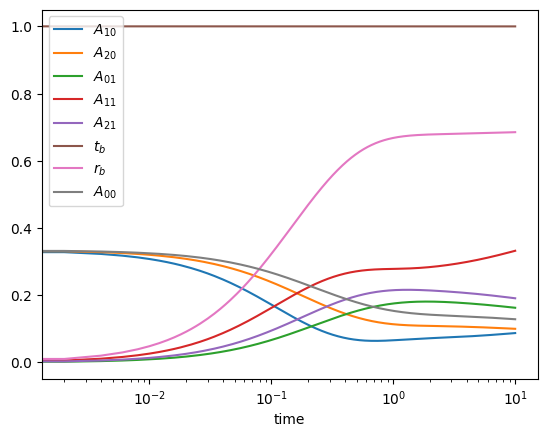

In [191]:
z = solve_ivp(model, tspan, z0, method='Radau', t_eval=t)

A0 = 1 - z.y[0]-z.y[1]-z.y[2]-z.y[3]-z.y[4]

plt.plot(t, z.y[0], label = r'$A_{10}$')
plt.plot(t, z.y[1], label = r'$A_{20}$')
plt.plot(t, z.y[2], label = r'$A_{01}$')
plt.plot(t, z.y[3], label = r'$A_{11}$')
plt.plot(t, z.y[4], label = r'$A_{21}$')
plt.plot(t, z.y[5], label = r'$t_{b}$')
plt.plot(t, z.y[6], label = r'$r_{b}$')
plt.plot(t, A0, label = r'$A_{00}$')
plt.xscale('log')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()

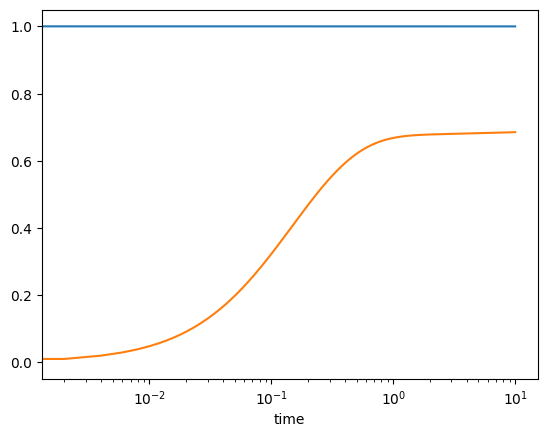

In [192]:
plt.plot(t, z.y[5], label = r'$t^b$')
plt.plot(t, z.y[6], label = r'$t^b$')
plt.xlabel('time')
plt.xscale('log')
plt.show()

In [193]:
def simple_model(t, z):
    return (k-koff)*z**2 -2*k*z + k

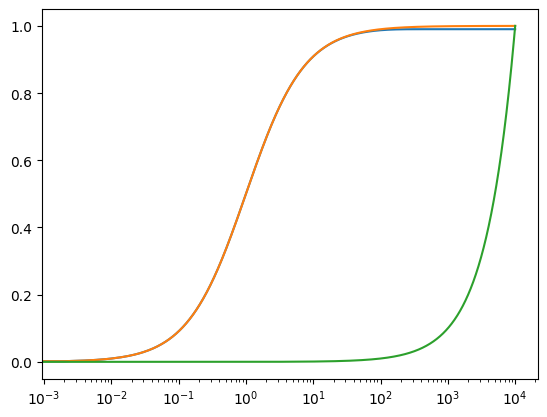

In [194]:
tend = 10000
t = np.linspace(0, tend, 5000000)
tspan = [0, tend]

z = solve_ivp(simple_model, tspan, y0=[0], method='Radau', t_eval=t)

plt.plot(t, z.y[0])
plt.xscale('log')
plt.plot(t, 1 - (1/(k*t + 1)))
plt.plot(t, k*koff*t)